In [2]:
from collections import OrderedDict
import dash
#import dash_core_components as dcc
from dash import dcc
#import dash_html_components as html
from dash import html
from dash.dependencies import Input, Output, State, ClientsideFunction
#import dash_core_components as dcc
from dash import dcc
import plotly.express as px
import plotly.graph_objects as go
import  plotly as py
#import pandas as pd
import sys
import numpy as np
import os
import geopandas as gpd
import pandas as pd
#from dask import dataframe as dd
import plotly.express as px
import  plotly as py
from plotly.subplots import make_subplots
import os
from pyproj import Transformer
from shapely.geometry import Point
import math
import random
from datetime import datetime, date, timedelta, time
import queue
import threading
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#import vaex

In [3]:
print(os.getcwd())

c:\Users\sookim\Documents\abm-0301\ABM-dashboard


In [4]:

path = os.path.join('..', 'ABM-simulator', 'SimulationEngine', 'output', '0308', 'run-no-intervention')
print(path)

dlist = []
for root, dirs, files in os.walk(path):
#for root, dirs, files in os.walk(path2):
    for file in files:
        if file.startswith("plot_"):
            #print(file)
            no = file.split('_')[1].split('.')[0]
            d = pd.read_csv(os.path.join(root, file))
            # d['chunk'] = no
            #if get_RMSE(no, d['vcases'], d['cases']) < 400:
            dlist.append(d)

print('All plots-Loading completed!')
plotdf = pd.concat(dlist, axis=1)
df1=plotdf
df1['vcases'].head(150)

..\ABM-simulator\SimulationEngine\output\0308\run-no-intervention
All plots-Loading completed!


,vcases,vcases
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
145,590.0,590.0
146,442.0,442.0
147,397.0,397.0
148,335.0,335.0


In [5]:
plotdf.drop('date', axis=1, inplace=True)
plotdf['date']=dlist[0]['date'].tolist()
plotdf

,cases,admissions,deaths,cases_65,admissions_65,deaths_65,cases_18,admissions_18,deaths_18,cases_1,...,cases_175-200,admissions_175-200,deaths_175-200,cases_200-1800,admissions_200-1800,deaths_200-1800,vcases,vadmissions,vdeaths,date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2020-03-01
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2020-03-02
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2020-03-03
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2020-03-04
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,2020-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,8582,686,37,1273,117,3,5612,381,25,1653,...,1270,87,3,10044,819,39,1563.0,0.0,0.0,2022-01-26
697,8833,618,37,1323,104,3,5751,345,25,1717,...,1288,81,3,10272,752,40,2171.0,557.0,0.0,2022-01-27
698,8736,630,37,1303,99,3,5655,371,25,1738,...,1284,89,3,10184,762,40,1412.0,0.0,0.0,2022-01-28
699,8497,701,37,1286,107,3,5458,428,25,1719,...,1256,98,3,10015,797,40,1309.0,0.0,0.0,2022-01-29


<AxesSubplot:>

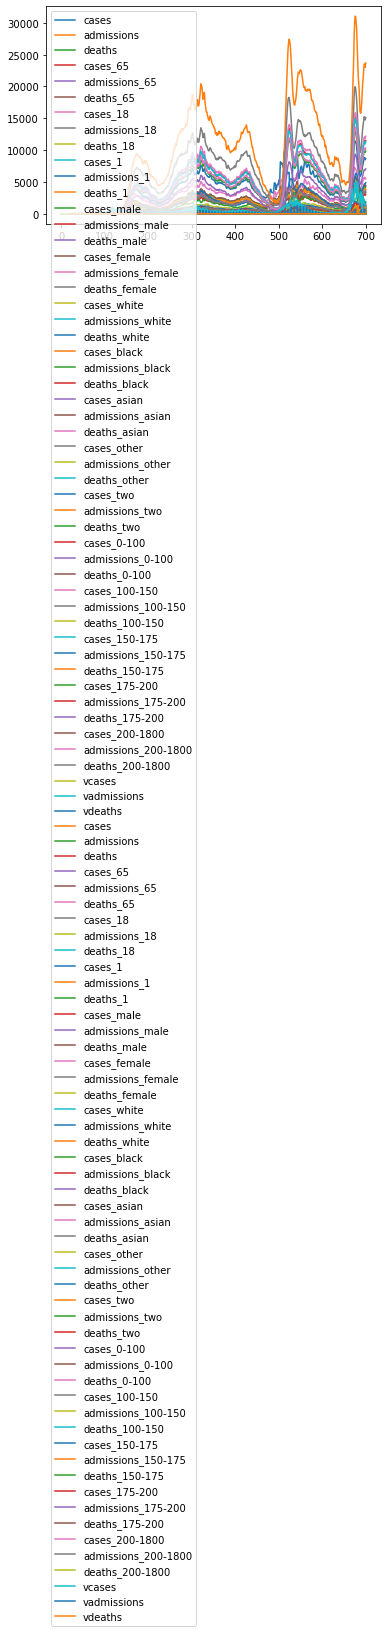

In [6]:
plotdf.plot()

In [6]:
plotdf['Date'] = pd.to_datetime(plotdf['date'])
plotdf['Week_Number'] = plotdf['Date'].dt.week
plotdf['Year'] = plotdf['Date'].dt.year
plotdf[['Date','Week_Number', 'Year']]

plotdf.set_index('Date')

C:\Users\sookim\AppData\Local\Temp\ipykernel_12160\749711995.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  plotdf['Week_Number'] = plotdf['Date'].dt.week


,cases,admissions,deaths,cases_65,admissions_65,deaths_65,cases_18,admissions_18,deaths_18,cases_1,...,deaths_175-200,cases_200-1800,admissions_200-1800,deaths_200-1800,vcases,vadmissions,vdeaths,date,Week_Number,Year
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,2020-03-01,9,2020
2020-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,2020-03-02,10,2020
2020-03-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,2020-03-03,10,2020
2020-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,2020-03-04,10,2020
2020-03-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,2020-03-05,10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-26,8582,686,37,1273,117,3,5612,381,25,1653,...,3,10044,819,39,1563.0,0.0,0.0,2022-01-26,4,2022
2022-01-27,8833,618,37,1323,104,3,5751,345,25,1717,...,3,10272,752,40,2171.0,557.0,0.0,2022-01-27,4,2022
2022-01-28,8736,630,37,1303,99,3,5655,371,25,1738,...,3,10184,762,40,1412.0,0.0,0.0,2022-01-28,4,2022


In [7]:
import numbers

max = plotdf.groupby(plotdf.columns, axis=1).max()
min = plotdf.groupby(plotdf.columns, axis=1).min()
#mean = plotdf.groupby(plotdf.columns, axis=1).mean() # error! return 0s ... use transpose() for fix
df2=plotdf.transpose()
df2 = df2.groupby(by=df2.index, axis=0).apply(lambda g: g.mean() if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[0])
mean = df2.transpose()        
mean

,Date,Week_Number,Year,admissions,admissions_0-100,admissions_1,admissions_100-150,admissions_150-175,admissions_175-200,admissions_18,...,deaths_asian,deaths_black,deaths_female,deaths_male,deaths_other,deaths_two,deaths_white,vadmissions,vcases,vdeaths
0,2020-03-01,9.0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2020-03-02,10.0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2020-03-03,10.0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2020-03-04,10.0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2020-03-05,10.0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2022-01-26,4.0,2022.0,1266.0,386.0,327.5,191.0,88.5,60.5,737.0,...,1.5,25.0,31.5,25.0,3.0,3.5,23.5,0.0,1563.0,0.0
697,2022-01-27,4.0,2022.0,1163.0,353.0,288.5,176.0,84.0,56.5,687.0,...,1.5,25.5,32.0,25.0,3.0,3.5,23.5,557.0,2171.0,0.0
698,2022-01-28,4.0,2022.0,1206.0,374.0,273.5,181.5,87.0,60.0,745.0,...,1.5,25.0,32.5,24.5,3.0,3.5,24.0,0.0,1412.0,0.0
699,2022-01-29,4.0,2022.0,1277.0,405.5,275.5,185.5,91.0,68.5,804.5,...,1.5,25.5,33.0,25.0,3.0,3.5,24.5,0.0,1309.0,0.0


In [8]:
df2 = mean.groupby(['Year','Week_Number'], as_index=False).sum()
df2.head(102)

C:\Users\sookim\AppData\Local\Temp\ipykernel_12160\3139998835.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df2 = mean.groupby(['Year','Week_Number'], as_index=False).sum()


,Year,Week_Number,admissions,admissions_0-100,admissions_1,admissions_100-150,admissions_150-175,admissions_175-200,admissions_18,admissions_200-1800,...,deaths_asian,deaths_black,deaths_female,deaths_male,deaths_other,deaths_two,deaths_white,vadmissions,vcases,vdeaths
0,2020.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0
4,2020.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2021.0,53.0,4182.0,1360.0,708.5,579.0,276.0,185.0,2844.5,1774.5,...,1.5,30.0,29.0,38.5,1.5,4.5,30.0,0.0,1930.0,19.0
98,2022.0,1.0,4235.5,1319.0,686.0,636.0,259.5,216.0,2971.5,1794.5,...,10.5,154.0,216.0,170.0,21.0,31.5,169.0,469.0,25287.0,0.0
99,2022.0,2.0,12860.5,4112.5,2066.0,1737.5,737.0,731.0,8785.0,5503.5,...,10.5,155.5,213.5,169.5,21.0,31.5,164.5,686.0,21974.0,1308.0
100,2022.0,3.0,16694.5,5243.0,3601.5,2341.5,1041.0,927.5,10366.0,7104.0,...,10.5,162.5,213.0,167.0,21.0,24.5,161.5,627.0,15118.0,22.0


<AxesSubplot:>

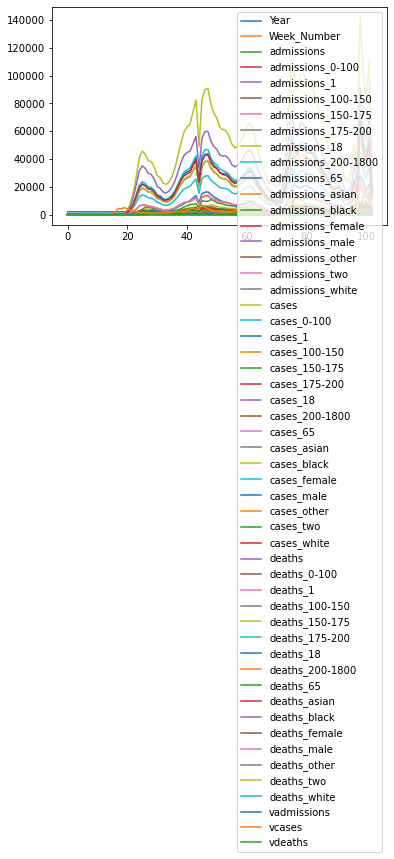

In [9]:
df2.plot()

11


<AxesSubplot:>

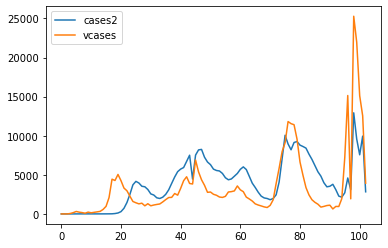

In [23]:
#sf=df2['cases'].quantile([0.25])
sf=11
print(sf)
df2['cases2']=df2['cases']/sf
df2[['cases2','vcases']].plot()

<AxesSubplot:>

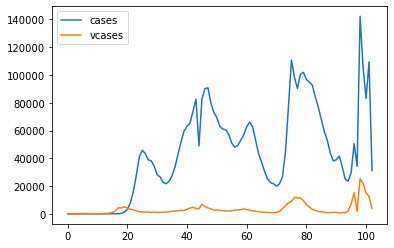

In [17]:
df2[['cases', 'vcases']].plot()

<AxesSubplot:>

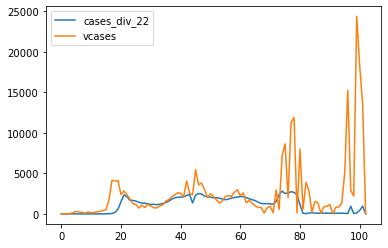

In [ ]:
df2['cases_div_22']=df2['cases']/22
df2[['cases_div_22','vcases']].plot()